<a href="https://colab.research.google.com/github/ttknguyen/CS114.L22.KHCL/blob/master/BaiTapColab/Bai2/Run_time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT COLAB 2: Dự đoán thời gian chạy của chương trình**

**Thành viên nhóm:** 
  *   Thái Trần Khánh Nguyên - 19520188
  *   Nguyễn Khánh Như - 19520209
  *   Đoàn Nguyễn Nhật Quang - 19520235

**Link tham khảo:**
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# **Import Libraries & Read Data Set**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from google.colab import drive
import os
import math

In [ ]:
colnames = ['Size', 'Time']

dataTrain = pd.read_csv("https://cs.uit.edu.vn/data2.txt", names = colnames)
dataTest = pd.read_csv("https://cs.uit.edu.vn/data3.txt", names = colnames)

print('\033[1m' + '     Training Data' + '\033[0m')
print(dataTrain)

print('\033[1m' + '       Test Data' + '\033[0m')
print(dataTest)

     Training Data
          Size      Time
0      6083695  0.521842
1      1954367  0.152648
2      3734185  0.298548
3      5839301  0.460480
4      6343427  0.527977
...        ...       ...
71110  4472112  0.350379
71111  5471895  0.429955
71112  9837364  0.801394
71113  9466593  0.776407
71114  4080801  0.314468

[71115 rows x 2 columns]
       Test Data
           Size     Time
0      37837612  4.12166
1      37395246  3.92089
2      36610827  3.21540
3      29555651  2.54506
4      25928216  2.21831
...         ...      ...
10585  26872494  2.35117
10586  20753811  1.79155
10587  33520323  2.90918
10588  21243264  1.80292
10589  21380484  1.82795

[10590 rows x 2 columns]


In [ ]:
x_train = np.array(dataTrain['Size'])
x_train = x_train.reshape(-1, 1)
y_train = np.array(dataTrain['Time']).reshape(-1, 1)

x_test = np.array(dataTest['Size']).reshape(-1, 1)
y_test = np.array(dataTest['Time']).reshape(-1, 1)

# **Visualization**

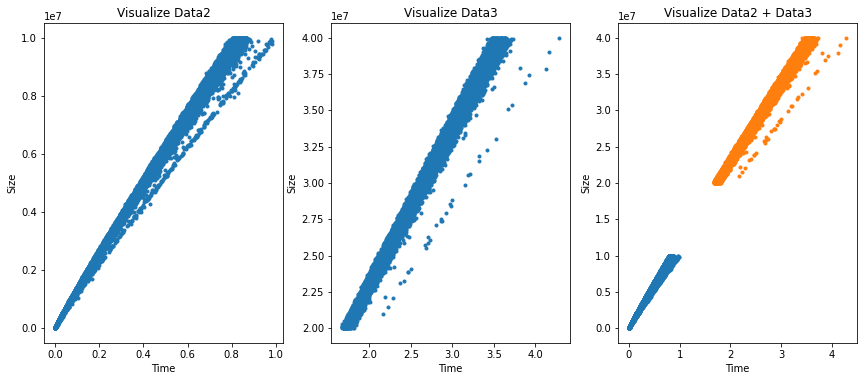

In [ ]:
# Mô hình hóa dữ liệu
plt.figure(figsize = (30, 20))

#Visualize Data2 
plt.subplot(3, 6, 1)
plt.plot(y_train, x_train, '.')
plt.xlabel('Time')
plt.ylabel('Size')
plt.title('Visualize Data2')

#Visualize Data3
plt.subplot(3, 6, 2)
plt.plot(y_test, x_test, '.')
plt.xlabel('Time')
plt.ylabel('Size')
plt.title('Visualize Data3')

#Visualize Data4
plt.subplot(3, 6, 3)
plt.plot(y_train, x_train, '.')
plt.plot(y_test, x_test, '.')
plt.xlabel('Time')
plt.ylabel('Size')
plt.title('Visualize Data2 + Data3')

plt.show()

# **Train Model**

## **Linear Regression**

In [ ]:
rt = LinearRegression().fit(x_train, y_train)
rt.intercept_ , rt.coef_

(array([-0.01589553]), array([[8.45569856e-08]]))

In [ ]:
y_pred = rt.predict(x_train)
mse = sklearn.metrics.mean_squared_error(y_train, y_pred)
print("MSE of Data Train:", mse)

MSE of Data Train: 0.00014337728721748835


In [ ]:
# Tính trung bình cộng thời gian chạy của Data Test
print("Average of y_test:", np.average(y_test))

# Mean Square Error of Data Test 
y_pred = rt.predict(x_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE of Data Test:", mse)

error = math.sqrt(mse) / np.average(y_test)
print("Error(%):", error*100)

Average of y_test: 2.642811968838527
MSE of Data Test: 0.020664949397549082
Error(%): 5.439398887357004


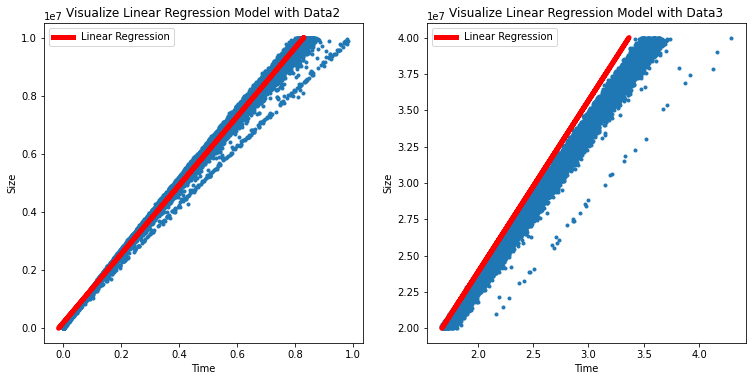

In [ ]:
# Visualize 
plt.figure(figsize = (40, 20))

plt.subplot(3, 6, 1)
plt.plot(y_train, x_train, '.')
plt.plot(rt.predict(x_train), x_train, label='Linear Regression', color = 'Red', linewidth = '5') 
plt.xlabel('Time')
plt.ylabel('Size')
plt.title('Visualize Linear Regression Model with Data2')
plt.legend()

plt.subplot(3, 6, 2)
plt.plot(y_test, x_test, '.')
plt.plot(y_pred, x_test, label='Linear Regression', color = 'Red', linewidth = '5') 
plt.xlabel('Time')
plt.ylabel('Size')
plt.title('Visualize Linear Regression Model with Data3')
plt.legend()

plt.show()

## **Cải thiện model Linear Regression (Multivariate Regression)**

In [ ]:
multiX = x_train.copy()
multiX = np.hstack((multiX, x_train**2))
multiX = np.hstack((multiX, x_train*np.log(x_train)))
multiX = np.hstack((multiX, np.log(x_train)))
multiX

array([[6.08369500e+06, 3.70113449e+13, 9.50341467e+07, 1.56211228e+01],
       [1.95436700e+06, 3.81955037e+12, 2.83101335e+07, 1.44855769e+01],
       [3.73418500e+06, 1.39441376e+13, 5.65095715e+07, 1.51330401e+01],
       ...,
       [9.83736400e+06, 9.67737305e+13, 1.58398268e+08, 1.61016983e+01],
       [9.46659300e+06, 8.96163830e+13, 1.52064531e+08, 1.60632796e+01],
       [4.08080100e+06, 1.66529368e+13, 6.21171524e+07, 1.52218039e+01]])

In [ ]:
multiX_test = x_test.copy()
multiX_test = np.hstack((multiX_test, x_test**2))
multiX_test = np.hstack((multiX_test, x_test*np.log(x_test)))
multiX_test = np.hstack((multiX_test, np.log(x_test)))
multiX_test

array([[3.78376120e+07, 1.43168488e+15, 6.60221461e+08, 1.74488142e+01],
       [3.73952460e+07, 1.39840442e+15, 6.52062929e+08, 1.74370541e+01],
       [3.66108270e+07, 1.34035265e+15, 6.37608839e+08, 1.74158546e+01],
       ...,
       [3.35203230e+07, 1.12361205e+15, 5.80828843e+08, 1.73276625e+01],
       [2.12432640e+07, 4.51276265e+14, 3.58406800e+08, 1.68715504e+01],
       [2.13804840e+07, 4.57125096e+14, 3.60859576e+08, 1.68779891e+01]])

In [ ]:
rt1 = LinearRegression().fit(multiX, y_train)
rt1.intercept_ , rt1.coef_

(array([-2.56910181e-05]),
 array([[ 5.04822399e-09, -8.53187792e-18,  4.88768713e-09,
          1.89058084e-05]]))

In [ ]:
y_pred1 = rt1.predict(multiX)
mse = sklearn.metrics.mean_squared_error(y_train, y_pred1)
print("MSE of Data Train:", mse)

MSE of Data Train: 0.00012190225045315814


In [ ]:
# Tính trung bình cộng thời gian chạy của Data Test
print("Average of y_test:", np.average(y_test))

# Mean Square Error of Data Test 
y_pred1 = rt1.predict(multiX_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred1)
print("MSE of Data Test:", mse)

error = math.sqrt(mse) / np.average(y_test)
print("Error(%):", error*100)

Average of y_test: 2.642811968838527
MSE of Data Test: 0.004181195754594616
Error(%): 2.446718385312817


**Kết quả:**
> **Linear Regression:**

- Average of y_test: 2.642811968838527
- MSE of Data Test: 0.020664949397549082
- Error(%): 5.439398887357004 ≃ 5%

> **Multivariate Regression:**

- Average of y_test: 2.642811968838527
- MSE of Data Test: 0.004181195754594616
- Error(%): 2.446718385312817 ≃ 2.45%

**Nhận xét:**
> **Linear Regression**

- Ở bài toán này, với độ lệch là 5% thì model ở trên là **chưa đủ tốt**.
- Bởi vì chúng ta phải train trên 1 data set có input mang các giá trị nhỏ nhưng phải dự đoán trên data set có input lớn.
- Khi kích thước input lớn hơn thì giá trị lệch sẽ lớn hơn dẫn đến sai số cũng lớn hơn.

> **Multivariate Regression (MR)**

- Độ lệch giảm còn 2.45%.
- Khi sử dụng MR, ta  tăng chiều dữ liệu bằng cách thêm các giá trị x^2, xlog(x), log(x) thì thu được kết quả tốt hơn so với LR (Độ lệch giảm gần 2 lần so với độ lệch của LR)

**Kết luận:**

Trong bài toán Linear Regression, để cải thiện model thì ta có thể tăng chiều dữ liệu lên giúp cho bài toán được dự đoán, giải quyết một cách chính xác hơn. 